In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import math

,Unnamed: 0,building id,Peak Load
0,0,1,27.724174
1,0,2,20.164945
2,0,3,18.771555
3,0,4,16.617412
4,0,5,27.902137
...,...,...,...
395,0,396,12.189566
396,0,397,12.662940
397,0,398,4.833286
398,0,399,14.577960


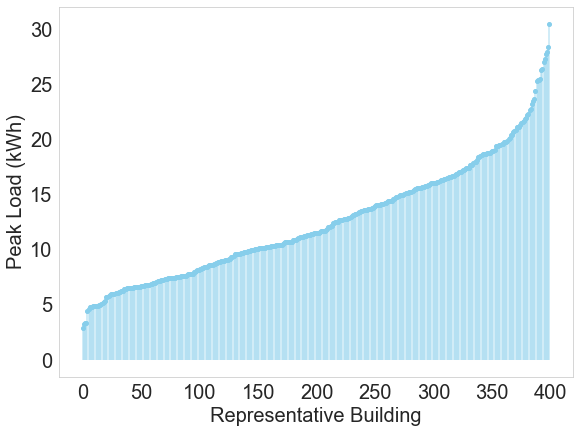

In [4]:
# Read building peak load:
load_folder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\Peakload.xlsx"
peakLoad = pd.read_excel(load_folder)

# Graph peak load:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_peakLoad = peakLoad.sort_values(by='Peak Load')
ordered_peakLoad = ordered_peakLoad.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['Peak Load'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("Peak Load (kWh)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
peakLoad

,index,Unnamed: 0,building id,Peak Load,MgSO4 Salt Mass E,MgSO4 Salt Mass P,MgSO4 Salt Mass
0,304,0,305,2.931349,3.908466,10.422497,25
1,210,0,211,3.267824,4.357098,11.618842,25
2,233,0,234,3.335892,4.447856,11.860861,25
3,338,0,339,3.346160,4.461547,11.897369,25
4,99,0,100,4.456120,5.941494,15.843865,25
...,...,...,...,...,...,...,...
395,385,0,386,27.341019,36.454692,97.211787,100
396,0,0,1,27.724174,36.965566,98.574106,100
397,4,0,5,27.902137,37.202850,99.206859,100
398,399,0,400,28.411462,37.881950,101.017779,125


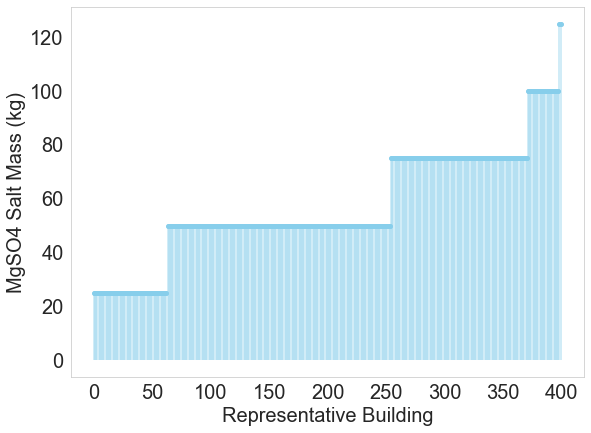

In [11]:
# Calculate salt masses required for MgSO4:
ordered_peakLoad['MgSO4 Salt Mass E'] = ordered_peakLoad['Peak Load']/0.75
ordered_peakLoad['MgSO4 Salt Mass P'] = ordered_peakLoad['Peak Load']/0.2812521
ordered_peakLoad['MgSO4 Salt Mass'] = ordered_peakLoad[['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E']].max(axis=1)

ordered_peakLoad['MgSO4 Salt Mass sized'] = ordered_peakLoad['MgSO4 Salt Mass'].apply(lambda x: int(math.ceil(x/25.0))*25)

ordered_peakLoad

# Graph MgSO4 mass:
fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['MgSO4 Salt Mass'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("MgSO4 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ordered_peakLoad

,index,Unnamed: 0,building id,Peak Load,MgSO4 Salt Mass E,MgSO4 Salt Mass P,MgSO4 Salt Mass,MgCl2 Salt Mass E,MgCl2 Salt Mass P,MgCl2 Salt Mass,MgCl2 Salt Mass sized
0,304,0,305,2.931349,3.908466,10.422497,25,15.162151,34.529722,34.529722,100
1,210,0,211,3.267824,4.357098,11.618842,25,16.902537,38.493211,38.493211,100
2,233,0,234,3.335892,4.447856,11.860861,25,17.254614,39.295018,39.295018,100
3,338,0,339,3.346160,4.461547,11.897369,25,17.307724,39.415969,39.415969,100
4,99,0,100,4.456120,5.941494,15.843865,25,23.048899,52.490707,52.490707,100
...,...,...,...,...,...,...,...,...,...,...,...
395,385,0,386,27.341019,36.454692,97.211787,100,141.419065,322.062538,322.062538,400
396,0,0,1,27.724174,36.965566,98.574106,100,143.400902,326.575900,326.575900,400
397,4,0,5,27.902137,37.202850,99.206859,100,144.321400,328.672208,328.672208,400
398,399,0,400,28.411462,37.881950,101.017779,125,146.955840,334.671783,334.671783,400


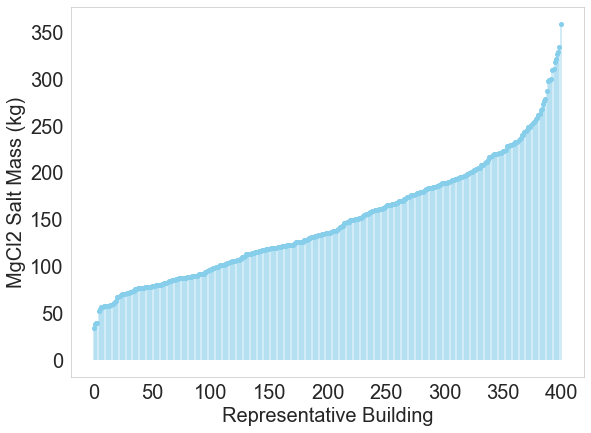

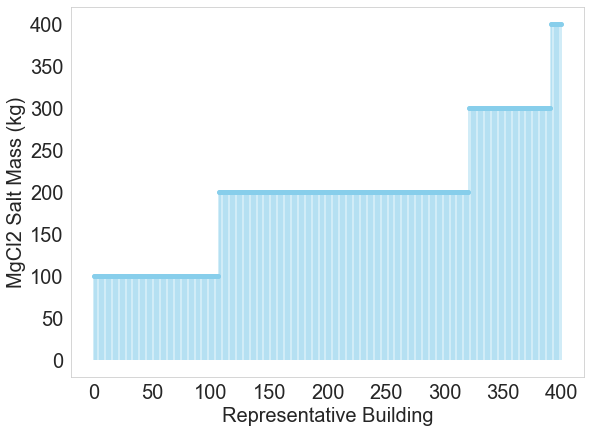

In [14]:
# Calculate salt masses required for MgCl2:
ordered_peakLoad['MgCl2 Salt Mass E'] = ordered_peakLoad['Peak Load']/0.1933333333
ordered_peakLoad['MgCl2 Salt Mass P'] = ordered_peakLoad['Peak Load']/0.08489351
ordered_peakLoad['MgCl2 Salt Mass'] = ordered_peakLoad[['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E']].max(axis=1)
ordered_peakLoad['MgCl2 Salt Mass sized'] = ordered_peakLoad['MgCl2 Salt Mass'].apply(lambda x: int(math.ceil(x/100.0))*100)

# Graph MgSO4 mass:
fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['MgCl2 Salt Mass'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("MgCl2 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['MgCl2 Salt Mass sized'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("MgCl2 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ordered_peakLoad

,index,Unnamed: 0,building id,Peak Load,MgSO4 Salt Mass E,MgSO4 Salt Mass P,MgSO4 Salt Mass,MgCl2 Salt Mass E,MgCl2 Salt Mass P,MgCl2 Salt Mass,MgCl2 Salt Mass sized,K2CO3 Salt Mass E,K2CO3 Salt Mass P,K2CO3 Salt Mass,K2CO3 Salt Mass sized
0,304,0,305,2.931349,3.908466,10.422497,25,15.162151,34.529722,34.529722,100,15.868958,1.791712,15.868958,25
1,210,0,211,3.267824,4.357098,11.618842,25,16.902537,38.493211,38.493211,100,17.690475,1.997373,17.690475,25
2,233,0,234,3.335892,4.447856,11.860861,25,17.254614,39.295018,39.295018,100,18.058964,2.038978,18.058964,25
3,338,0,339,3.346160,4.461547,11.897369,25,17.307724,39.415969,39.415969,100,18.114550,2.045254,18.114550,25
4,99,0,100,4.456120,5.941494,15.843865,25,23.048899,52.490707,52.490707,100,24.123359,2.723689,24.123359,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,0,386,27.341019,36.454692,97.211787,100,141.419065,322.062538,322.062538,400,148.011533,16.711494,148.011533,150
396,0,0,1,27.724174,36.965566,98.574106,100,143.400902,326.575900,326.575900,400,150.085756,16.945688,150.085756,175
397,4,0,5,27.902137,37.202850,99.206859,100,144.321400,328.672208,328.672208,400,151.049165,17.054463,151.049165,175
398,399,0,400,28.411462,37.881950,101.017779,125,146.955840,334.671783,334.671783,400,153.806413,17.365775,153.806413,175


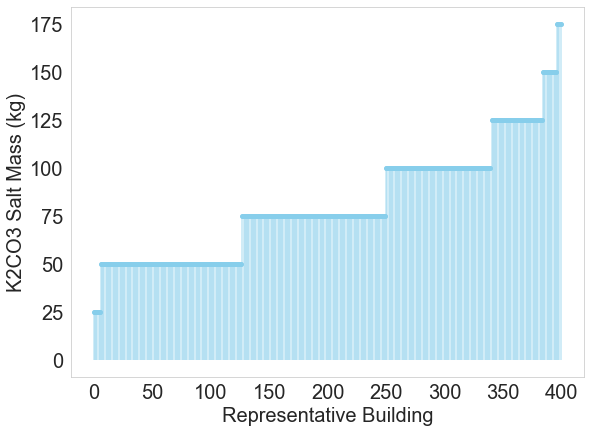

In [17]:
# Calculate salt masses required for K2CO3:
ordered_peakLoad['K2CO3 Salt Mass E'] = ordered_peakLoad['Peak Load']/0.1847222222
ordered_peakLoad['K2CO3 Salt Mass P'] = ordered_peakLoad['Peak Load']/1.636060713
ordered_peakLoad['K2CO3 Salt Mass'] = ordered_peakLoad[['K2CO3 Salt Mass P', 'K2CO3 Salt Mass E']].max(axis=1)
ordered_peakLoad['K2CO3 Salt Mass sized'] = ordered_peakLoad['K2CO3 Salt Mass'].apply(lambda x: int(math.ceil(x/25.0))*25)

ordered_peakLoad

# Graph MgSO4 mass:
fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['K2CO3 Salt Mass sized'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("K2CO3 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ordered_peakLoad

,index,Unnamed: 0,building id,Peak Load,MgSO4 Salt Mass E,MgSO4 Salt Mass P,MgSO4 Salt Mass,MgCl2 Salt Mass E,MgCl2 Salt Mass P,MgCl2 Salt Mass,MgCl2 Salt Mass sized,K2CO3 Salt Mass E,K2CO3 Salt Mass P,K2CO3 Salt Mass,K2CO3 Salt Mass sized,SrBr2 Salt Mass E,SrBr2 Salt Mass P,SrBr2 Salt Mass,SrBr2 Salt Mass sized
0,304,0,305,2.931349,3.908466,10.422497,25,15.162151,34.529722,34.529722,100,15.868958,1.791712,15.868958,25,9.681521,22.961638,22.961638,100
1,210,0,211,3.267824,4.357098,11.618842,25,16.902537,38.493211,38.493211,100,17.690475,1.997373,17.690475,25,10.792812,25.597286,25.597286,100
2,233,0,234,3.335892,4.447856,11.860861,25,17.254614,39.295018,39.295018,100,18.058964,2.038978,18.058964,25,11.017625,26.130473,26.130473,100
3,338,0,339,3.346160,4.461547,11.897369,25,17.307724,39.415969,39.415969,100,18.114550,2.045254,18.114550,25,11.051537,26.210903,26.210903,100
4,99,0,100,4.456120,5.941494,15.843865,25,23.048899,52.490707,52.490707,100,24.123359,2.723689,24.123359,25,14.717462,34.905367,34.905367,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,0,386,27.341019,36.454692,97.211787,100,141.419065,322.062538,322.062538,400,148.011533,16.711494,148.011533,150,90.300614,214.165739,214.165739,300
396,0,0,1,27.724174,36.965566,98.574106,100,143.400902,326.575900,326.575900,400,150.085756,16.945688,150.085756,175,91.566081,217.167042,217.167042,300
397,4,0,5,27.902137,37.202850,99.206859,100,144.321400,328.672208,328.672208,400,151.049165,17.054463,151.049165,175,92.153848,218.561049,218.561049,300
398,399,0,400,28.411462,37.881950,101.017779,125,146.955840,334.671783,334.671783,400,153.806413,17.365775,153.806413,175,93.836023,222.550658,222.550658,300


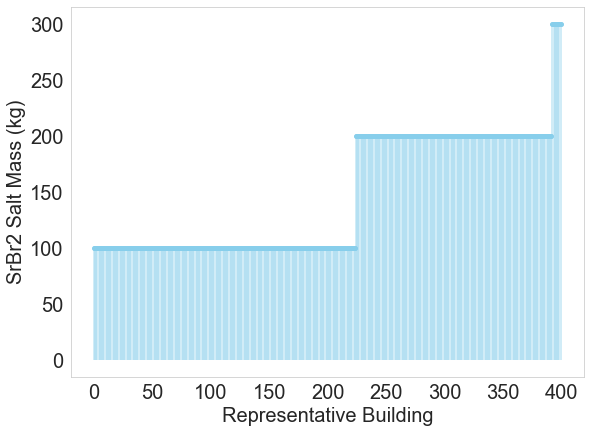

In [18]:
# Calculate salt masses required for K2CO3:
ordered_peakLoad['SrBr2 Salt Mass E'] = ordered_peakLoad['Peak Load']/0.3027777778
ordered_peakLoad['SrBr2 Salt Mass P'] = ordered_peakLoad['Peak Load']/0.1276629
ordered_peakLoad['SrBr2 Salt Mass'] = ordered_peakLoad[['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E']].max(axis=1)
ordered_peakLoad['SrBr2 Salt Mass sized'] = ordered_peakLoad['SrBr2 Salt Mass'].apply(lambda x: int(math.ceil(x/100.0))*100)
ordered_peakLoad

# Graph MgSO4 mass:
fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['SrBr2 Salt Mass sized'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("SrBr2 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ordered_peakLoad